In [1]:
#Libraries import

import os
import requests
import json
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas


Bad key "text.kerning_factor" on line 4 in
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [155]:
#Covid data import using API

resp = requests.get("https://api.covidtracking.com/v1/us/daily.json")
data = resp.text
corona_df = pd.read_json(data)

#Data cleanup
covid_df = corona_df[["date","positive", "negative", "hospitalizedCumulative","death"]]
covid_df.dropna(inplace=True)
covid_df.tail()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


date  positive  negative  hospitalizedCumulative  death
213  20200308       876      4049                     6.0   31.0
214  20200307       678      3333                     6.0   27.0
215  20200306       500      2672                     6.0   26.0
216  20200305       388      1949                     5.0   20.0
217  20200304       281      1417                     4.0   16.0

In [3]:
#Change format of data column
covid_df['date'] = pd.to_datetime(covid_df['date'], format='%Y%m%d')

#Prepare new dataframe
negative_df = covid_df[['date', 'negative']]

negative_df.set_index(['date'], inplace=True)
negative_df.dropna(inplace=True)
negative_df.head()


C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


negative
date                
2020-10-07  98656345
2020-10-06  97932855
2020-10-05  97210380
2020-10-04  96364124
2020-10-03  95539276

In [4]:
positive_df = covid_df[['date', 'positive']]
positive_df.set_index(['date'], inplace=True)

positive_df.dropna(inplace=True)
positive_df.head()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


positive
date                
2020-10-07   7511236
2020-10-06   7460634
2020-10-05   7421973
2020-10-04   7383840
2020-10-03   7345401

In [5]:
death_df = covid_df[['date', 'death']]
death_df.set_index(['date'], inplace=True)

death_df.dropna(inplace=True)
death_df.head()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


death
date                
2020-10-07  203591.0
2020-10-06  202675.0
2020-10-05  202041.0
2020-10-04  201715.0
2020-10-03  201352.0

In [6]:
hospitalized_df = covid_df[['date', 'hospitalizedCumulative']]
hospitalized_df.set_index(['date'], inplace=True)

hospitalized_df.dropna(inplace=True)
hospitalized_df.head()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


hospitalizedCumulative
date                              
2020-10-07                416711.0
2020-10-06                414461.0
2020-10-05                415085.0
2020-10-04                413566.0
2020-10-03                412917.0

In [7]:
etf_df = yf.download(['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
etf_df = etf_df['Close']
etf_df.head()


SPY        XLB        XLC        XLE        XLF        XLI  \
Date                                                                            
2020-01-02  324.869995  60.700001  54.259998  60.580002  31.080000  83.010002   
2020-01-03  322.410004  59.720001  53.910000  60.400002  30.750000  82.849998   
2020-01-06  323.640015  59.459999  54.630001  60.869999  30.730000  82.879997   
2020-01-07  322.730011  59.389999  54.700001  60.709999  30.530001  82.709999   
2020-01-08  324.450012  59.599998  55.090000  59.709999  30.730000  82.989998   

                  XLK        XLP       XLRE        XLU         XLV         XLY  
Date                                                                            
2020-01-02  93.389999  62.480000  38.220001  63.810001  102.129997  126.910004  
2020-01-03  92.339996  62.380001  38.500000  63.939999  101.239998  125.830002  
2020-01-06  92.559998  62.509998  38.509998  64.000000  101.870003  126.180000  
2020-01-07  92.519997  62.029999  38.090000  63.910000  101.669998  125.980003  
2020-01-08  93.510002  62.259998  38.279999  63.880001  102.330002  126.360001

## Market Comparison

In [8]:
market_comparison = etf_df[['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY']]
market_comparison.head()

XLC         XLY        XLP        XLE        XLF  \
Date                                                                 
2020-01-02  54.259998  126.910004  62.480000  60.580002  31.080000   
2020-01-03  53.910000  125.830002  62.380001  60.400002  30.750000   
2020-01-06  54.630001  126.180000  62.509998  60.869999  30.730000   
2020-01-07  54.700001  125.980003  62.029999  60.709999  30.530001   
2020-01-08  55.090000  126.360001  62.259998  59.709999  30.730000   

                   XLV        XLI        XLB       XLRE        XLK        XLU  \
Date                                                                            
2020-01-02  102.129997  83.010002  60.700001  38.220001  93.389999  63.810001   
2020-01-03  101.239998  82.849998  59.720001  38.500000  92.339996  63.939999   
2020-01-06  101.870003  82.879997  59.459999  38.509998  92.559998  64.000000   
2020-01-07  101.669998  82.709999  59.389999  38.090000  92.519997  63.910000   
2020-01-08  102.330002  82.989998  59.599998  38.279999  93.510002  63.880001   

                   SPY  
Date                    
2020-01-02  324.869995  
2020-01-03  322.410004  
2020-01-06  323.640015  
2020-01-07  322.730011  
2020-01-08  324.450012

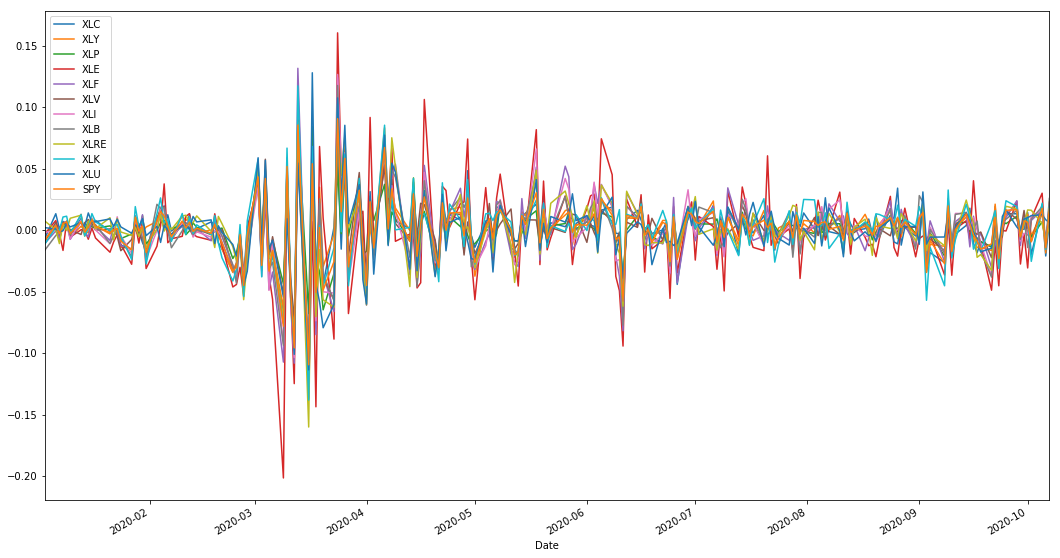

In [9]:
change_comparison=market_comparison.pct_change()
change_comparison.dropna(inplace=True)
change_comparison.plot(figsize = (18,10))

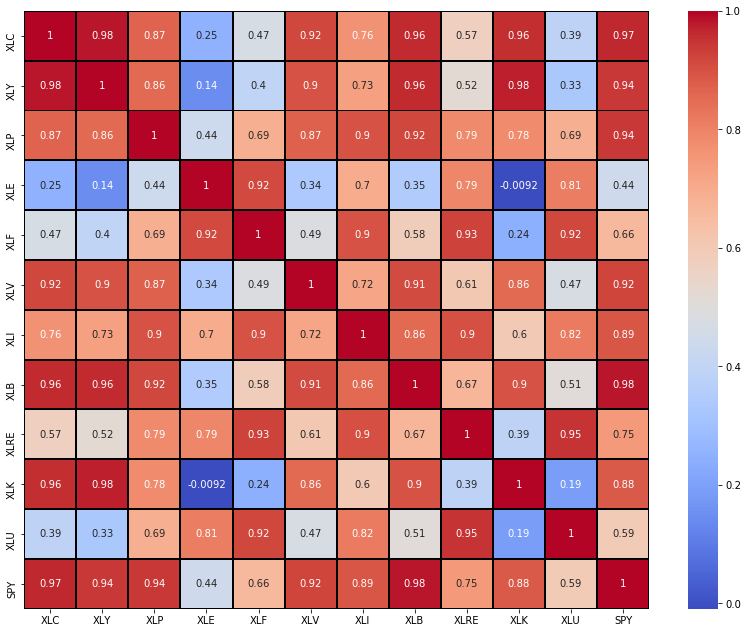

In [10]:
fig, ax = plt.subplots(figsize=(14,11))
sns.heatmap(market_comparison.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [11]:
def beta(ticker1, ticker2, window_size,df):
    covariance = df[ticker1].rolling(window=window_size).cov(df[ticker2])
    variance = df[ticker1].rolling(window=window_size).var()
    return covariance / variance

XLB_beta = beta('XLB','SPY',7,market_comparison)
XLC_beta = beta('XLC','SPY',7,market_comparison)
XLE_beta = beta('XLE','SPY',7,market_comparison)
XLF_beta = beta('XLF','SPY',7,market_comparison)
XLY_beta = beta('XLY','SPY',7,market_comparison)
XLP_beta = beta('XLP','SPY',7,market_comparison)
XLV_beta = beta('XLV','SPY',7,market_comparison)
XLI_beta = beta('XLI','SPY',7,market_comparison)
XLRE_beta = beta('XLRE','SPY',7,market_comparison)
XLK_beta = beta('XLK','SPY',7,market_comparison)
XLU_beta = beta('XLU','SPY',7,market_comparison)

In [12]:
XLB_beta.hvplot(label = "XLB") * XLC_beta.hvplot(label = "XLC") *  XLE_beta.hvplot(label = "XLE") * XLF_beta.hvplot(label = "XLF") *XLY_beta.hvplot(label = "XLY") * XLP_beta.hvplot(label = "XLP") * XLV_beta.hvplot(label = "XLV") * XLI_beta.hvplot(label = "XLI") * XLRE_beta.hvplot(label = "XLRE") * XLK_beta.hvplot(label = "XLK") * XLU_beta.hvplot(label = "XLU")

:Overlay
   .Curve.XLB  :Curve   [Date]   (0)
   .Curve.XLC  :Curve   [Date]   (0)
   .Curve.XLE  :Curve   [Date]   (0)
   .Curve.XLF  :Curve   [Date]   (0)
   .Curve.XLY  :Curve   [Date]   (0)
   .Curve.XLP  :Curve   [Date]   (0)
   .Curve.XLV  :Curve   [Date]   (0)
   .Curve.XLI  :Curve   [Date]   (0)
   .Curve.XLRE :Curve   [Date]   (0)
   .Curve.XLK  :Curve   [Date]   (0)
   .Curve.XLU  :Curve   [Date]   (0)

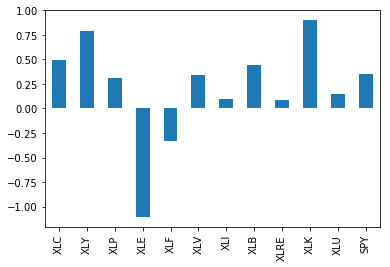

In [13]:
sharpe_ratios = (change_comparison.mean() * 252) / (change_comparison.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

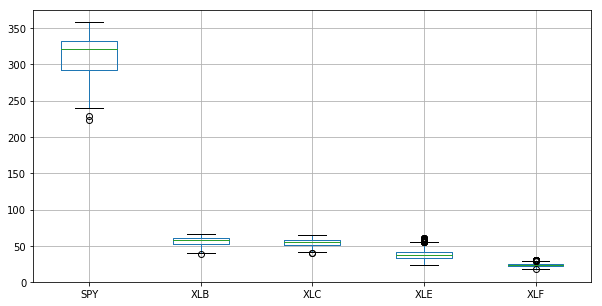

In [14]:
boxplot = market_comparison.boxplot(column=['SPY','XLB','XLC','XLE','XLF'],figsize=(10,5))

In [15]:
market_comparison.std()

XLC      5.440365
XLY     15.571236
XLP      3.477856
XLE      9.172551
XLF      3.307620
XLV      6.293249
XLI      8.620594
XLB      6.334173
XLRE     3.040197
XLK     12.297318
XLU      4.725044
SPY     28.122904
dtype: float64

In [16]:
positive_df.corrwith(market_comparison, axis = 0)

SPY        NaN
XLB        NaN
XLC        NaN
XLE        NaN
XLF        NaN
XLI        NaN
XLK        NaN
XLP        NaN
XLRE       NaN
XLU        NaN
XLV        NaN
XLY        NaN
positive   NaN
dtype: float64

In [17]:
negative_df.corrwith(market_comparison, axis = 0)

SPY        NaN
XLB        NaN
XLC        NaN
XLE        NaN
XLF        NaN
XLI        NaN
XLK        NaN
XLP        NaN
XLRE       NaN
XLU        NaN
XLV        NaN
XLY        NaN
negative   NaN
dtype: float64

In [18]:
death_df.corrwith(market_comparison, axis = 0)

SPY     NaN
XLB     NaN
XLC     NaN
XLE     NaN
XLF     NaN
XLI     NaN
XLK     NaN
XLP     NaN
XLRE    NaN
XLU     NaN
XLV     NaN
XLY     NaN
death   NaN
dtype: float64

In [19]:
hospitalized_df.corrwith(market_comparison, axis = 0)

SPY                      NaN
XLB                      NaN
XLC                      NaN
XLE                      NaN
XLF                      NaN
XLI                      NaN
XLK                      NaN
XLP                      NaN
XLRE                     NaN
XLU                      NaN
XLV                      NaN
XLY                      NaN
hospitalizedCumulative   NaN
dtype: float64

In [20]:
## Comparison by individual sectors with stocks and ETFs

### Materials

In [21]:
materials_df = yf.download(['HUN','EXP','NEM','FCX','SMG','SPY','XLB'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
materials_df = materials_df['Close']
materials_df.head()

EXP    FCX        HUN        NEM         SMG         SPY  \
Date                                                                         
2020-01-02  91.209999  13.20  23.870001  43.220001  105.639999  324.869995   
2020-01-03  90.940002  12.80  23.150000  42.830002  106.839996  322.410004   
2020-01-06  90.669998  12.85  23.059999  43.259998  105.059998  323.640015   
2020-01-07  90.459999  13.05  22.709999  43.230000  105.629997  322.730011   
2020-01-08  90.870003  13.18  22.879999  42.080002  105.059998  324.450012   

                  XLB  
Date                   
2020-01-02  60.700001  
2020-01-03  59.720001  
2020-01-06  59.459999  
2020-01-07  59.389999  
2020-01-08  59.599998

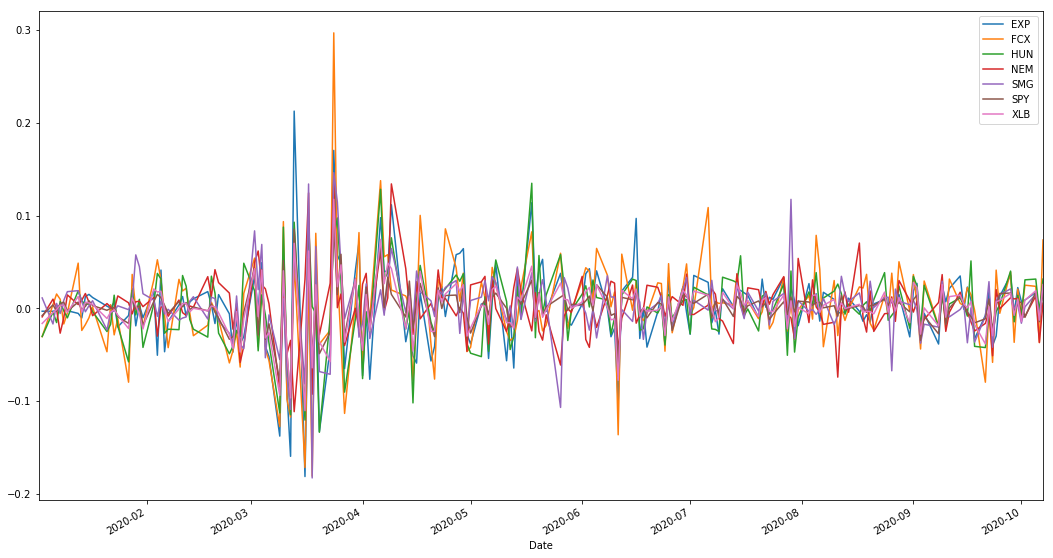

In [22]:
materials_change = materials_df.pct_change()
materials_change.plot(figsize = (18,10))

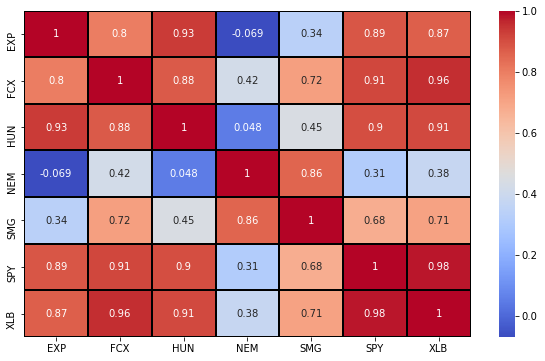

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(materials_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [24]:
EXP_beta = beta('EXP','SPY',7,materials_df)
FCX_beta = beta('FCX','SPY',7,materials_df)
HUN_beta = beta('HUN','SPY',7,materials_df)
NEM_beta = beta('NEM','SPY',7,materials_df)
SMG_beta = beta('SMG','SPY',7,materials_df)

In [25]:
XLB_beta.hvplot(label = "XLB") * EXP_beta.hvplot(label = "EXP") * FCX_beta.hvplot(label = "FCX") * HUN_beta.hvplot(label = "HUN") * NEM_beta.hvplot(label = "NEM") * SMG_beta.hvplot(label = "SMG")

:Overlay
   .Curve.XLB :Curve   [Date]   (0)
   .Curve.EXP :Curve   [Date]   (0)
   .Curve.FCX :Curve   [Date]   (0)
   .Curve.HUN :Curve   [Date]   (0)
   .Curve.NEM :Curve   [Date]   (0)
   .Curve.SMG :Curve   [Date]   (0)

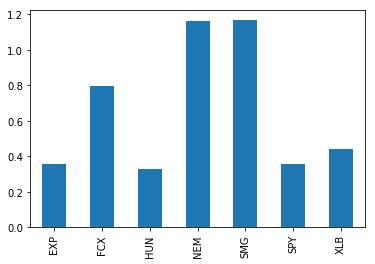

In [26]:
sharpe_ratios = (materials_change.mean() * 252) / (materials_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

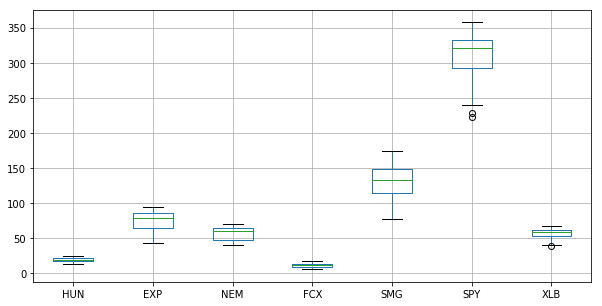

In [27]:
boxplot = materials_df.boxplot(column=['HUN','EXP','NEM','FCX','SMG','SPY','XLB'],figsize=(10,5))

In [28]:
materials_df.std()

EXP    13.315494
FCX     2.945199
HUN     2.900542
NEM     9.042842
SMG    21.587080
SPY    28.122904
XLB     6.334173
dtype: float64

In [29]:
positive_df.corrwith(materials_df, axis = 0)

EXP        NaN
FCX        NaN
HUN        NaN
NEM        NaN
SMG        NaN
SPY        NaN
XLB        NaN
positive   NaN
dtype: float64

In [30]:
negative_df.corrwith(materials_df, axis = 0)

EXP        NaN
FCX        NaN
HUN        NaN
NEM        NaN
SMG        NaN
SPY        NaN
XLB        NaN
negative   NaN
dtype: float64

In [31]:
death_df.corrwith(materials_df, axis = 0)

EXP     NaN
FCX     NaN
HUN     NaN
NEM     NaN
SMG     NaN
SPY     NaN
XLB     NaN
death   NaN
dtype: float64

In [32]:
hospitalized_df.corrwith(materials_df, axis = 0)

EXP                      NaN
FCX                      NaN
HUN                      NaN
NEM                      NaN
SMG                      NaN
SPY                      NaN
XLB                      NaN
hospitalizedCumulative   NaN
dtype: float64

### Communications

In [33]:
communications_df = yf.download(['VIAC','T','DISCK','FB','GOOG','SPY','XLC'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
communications_df = communications_df['Close']
communications_df.head()

DISCK          FB         GOOG         SPY          T  \
Date                                                                    
2020-01-02  30.190001  209.779999  1367.369995  324.869995  38.860001   
2020-01-03  30.020000  208.669998  1360.660034  322.410004  39.060001   
2020-01-06  29.959999  212.600006  1394.209961  323.640015  39.099998   
2020-01-07  29.990000  213.059998  1393.339966  322.730011  39.250000   
2020-01-08  30.150000  215.220001  1404.319946  324.450012  39.369999   

                 VIAC        XLC  
Date                              
2020-01-02  42.090000  54.259998  
2020-01-03  41.450001  53.910000  
2020-01-06  42.060001  54.630001  
2020-01-07  42.130001  54.700001  
2020-01-08  41.869999  55.090000

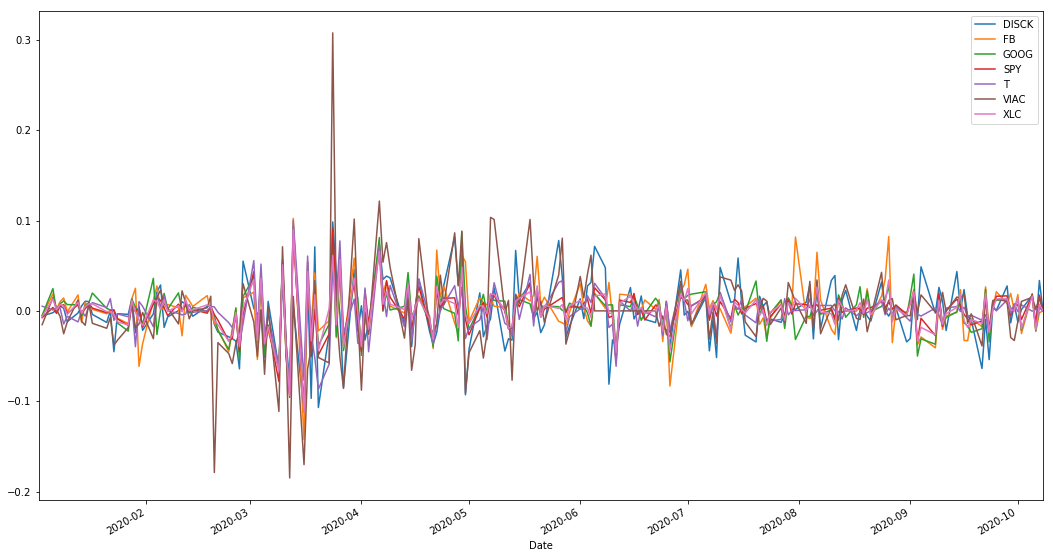

In [34]:
communications_change = communications_df.pct_change()
communications_change.plot(figsize = (18,10))

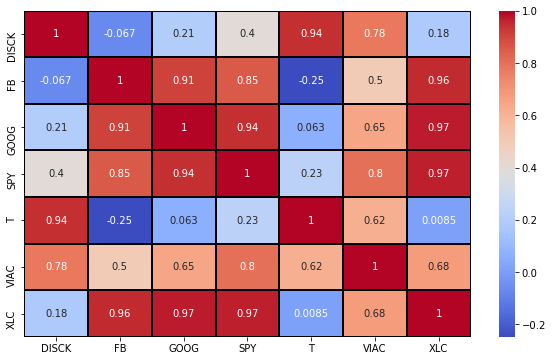

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(communications_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [36]:
DISCK_beta = beta('DISCK','SPY',7,communications_df)
FB_beta = beta('FB','SPY',7,communications_df)
GOOG_beta = beta('GOOG','SPY',7,communications_df)
T_beta = beta('T','SPY',7,communications_df)
VIAC_beta = beta('VIAC','SPY',7,communications_df)

In [37]:
XLC_beta.hvplot(label = "XLC") * DISCK_beta.hvplot(label = "DISCK") * FB_beta.hvplot(label = "FB") * GOOG_beta.hvplot(label = "GOOG") * T_beta.hvplot(label = "T") * VIAC_beta.hvplot(label = "VIAC")

:Overlay
   .Curve.XLC   :Curve   [Date]   (0)
   .Curve.DISCK :Curve   [Date]   (0)
   .Curve.FB    :Curve   [Date]   (0)
   .Curve.GOOG  :Curve   [Date]   (0)
   .Curve.T     :Curve   [Date]   (0)
   .Curve.VIAC  :Curve   [Date]   (0)

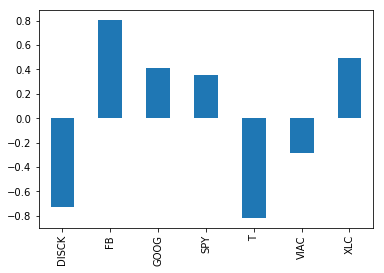

In [38]:
sharpe_ratios = (communications_change.mean() * 252) / (communications_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

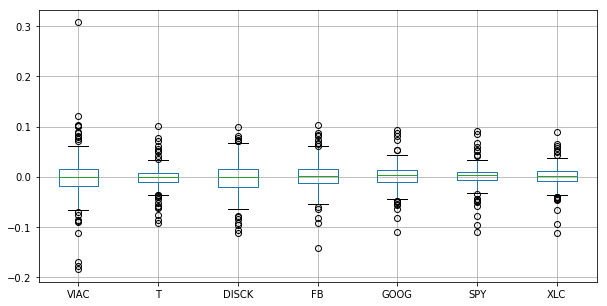

In [39]:
boxplot = communications_change.boxplot(column=['VIAC','T','DISCK','FB','GOOG','SPY','XLC'],figsize=(10,5))

In [40]:
communications_change.std()

DISCK    0.033872
FB       0.030173
GOOG     0.025799
SPY      0.023495
T        0.024265
VIAC     0.047354
XLC      0.022806
dtype: float64

In [41]:
positive_df.corrwith(communications_df, axis = 0)

DISCK      NaN
FB         NaN
GOOG       NaN
SPY        NaN
T          NaN
VIAC       NaN
XLC        NaN
positive   NaN
dtype: float64

In [42]:
negative_df.corrwith(communications_df, axis = 0)

DISCK      NaN
FB         NaN
GOOG       NaN
SPY        NaN
T          NaN
VIAC       NaN
XLC        NaN
negative   NaN
dtype: float64

In [43]:
death_df.corrwith(communications_df, axis = 0)

DISCK   NaN
FB      NaN
GOOG    NaN
SPY     NaN
T       NaN
VIAC    NaN
XLC     NaN
death   NaN
dtype: float64

In [44]:
hospitalized_df.corrwith(communications_df, axis = 0)

DISCK                    NaN
FB                       NaN
GOOG                     NaN
SPY                      NaN
T                        NaN
VIAC                     NaN
XLC                      NaN
hospitalizedCumulative   NaN
dtype: float64

### Energy

In [45]:
energy_df = yf.download(['OKE','COP','VLO','LNG','MUR','SPY','XLE'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
energy_df = energy_df['Close']
energy_df.head()


COP        LNG        MUR        OKE         SPY        VLO  \
Date                                                                            
2020-01-02  65.459999  62.320000  26.549999  75.709999  324.869995  95.129997   
2020-01-03  65.699997  62.630001  27.309999  76.580002  322.410004  91.519997   
2020-01-06  66.480003  62.959999  27.420000  76.910004  323.640015  91.529999   
2020-01-07  66.480003  63.599998  27.719999  76.849998  322.730011  92.730003   
2020-01-08  64.940002  61.990002  27.090000  75.650002  324.450012  93.089996   

                  XLE  
Date                   
2020-01-02  60.580002  
2020-01-03  60.400002  
2020-01-06  60.869999  
2020-01-07  60.709999  
2020-01-08  59.709999

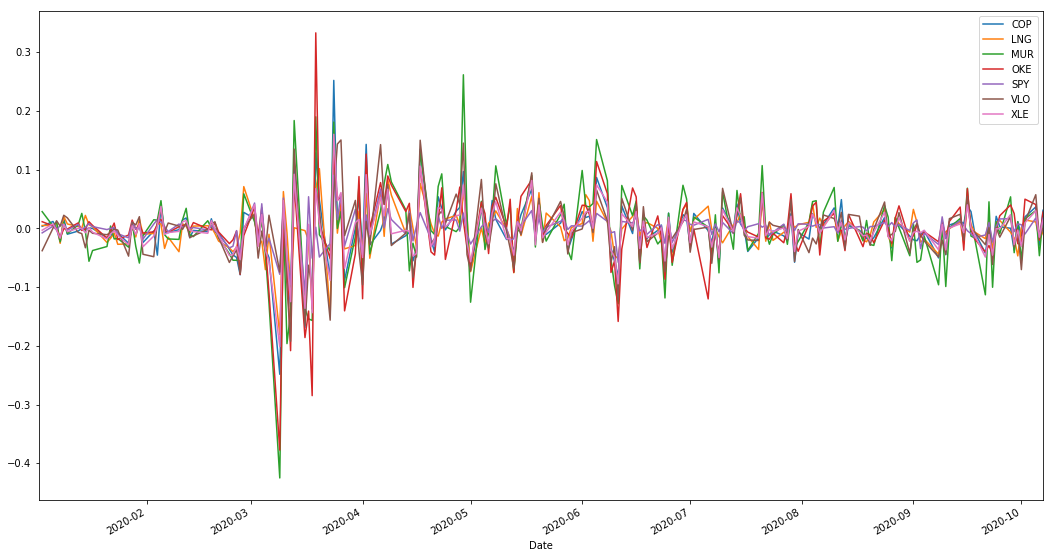

In [46]:
energy_change = energy_df.pct_change()
energy_change.plot(figsize = (18,10))

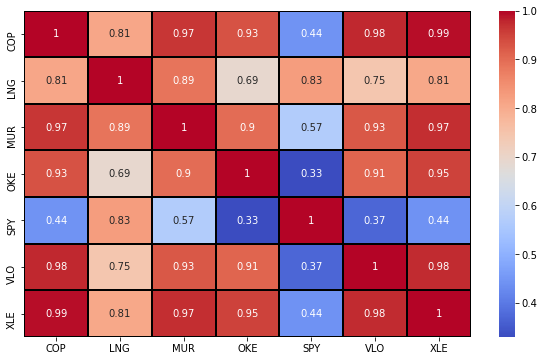

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(energy_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [48]:
OKE_beta = beta('OKE','SPY',7,energy_df)
COP_beta = beta('COP','SPY',7,energy_df)
VLO_beta = beta('VLO','SPY',7,energy_df)
LNG_beta = beta('LNG','SPY',7,energy_df)
MUR_beta = beta('MUR','SPY',7,energy_df)

In [49]:
XLC_beta.hvplot(label = "XLE") * OKE_beta.hvplot(label = "OKE") * COP_beta.hvplot(label = "COP") * VLO_beta.hvplot(label = "VLO") * LNG_beta.hvplot(label = "LNG") * MUR_beta.hvplot(label = "MUR")

:Overlay
   .Curve.XLE :Curve   [Date]   (0)
   .Curve.OKE :Curve   [Date]   (0)
   .Curve.COP :Curve   [Date]   (0)
   .Curve.VLO :Curve   [Date]   (0)
   .Curve.LNG :Curve   [Date]   (0)
   .Curve.MUR :Curve   [Date]   (0)

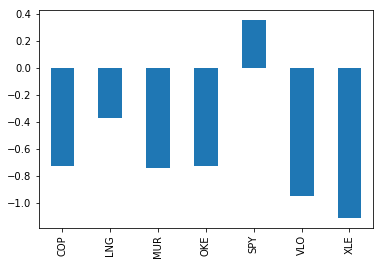

In [50]:
sharpe_ratios = (energy_change.mean() * 252) / (energy_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

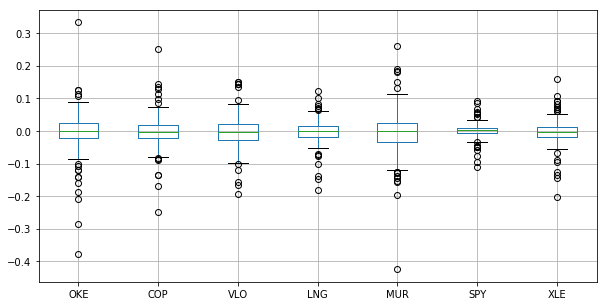

In [51]:
boxplot = energy_change.boxplot(column=['OKE','COP','VLO','LNG','MUR','SPY','XLE'],figsize=(10,5))

In [52]:
energy_change.std()

COP    0.047833
LNG    0.036532
MUR    0.069659
OKE    0.064538
SPY    0.023556
VLO    0.049628
XLE    0.039947
dtype: float64

In [53]:
positive_df.corrwith(energy_df, axis = 0)

COP        NaN
LNG        NaN
MUR        NaN
OKE        NaN
SPY        NaN
VLO        NaN
XLE        NaN
positive   NaN
dtype: float64

In [54]:
negative_df.corrwith(energy_df, axis = 0)

COP        NaN
LNG        NaN
MUR        NaN
OKE        NaN
SPY        NaN
VLO        NaN
XLE        NaN
negative   NaN
dtype: float64

In [55]:
death_df.corrwith(energy_df, axis = 0)

COP     NaN
LNG     NaN
MUR     NaN
OKE     NaN
SPY     NaN
VLO     NaN
XLE     NaN
death   NaN
dtype: float64

In [56]:
hospitalized_df.corrwith(energy_df, axis = 0)

COP                      NaN
LNG                      NaN
MUR                      NaN
OKE                      NaN
SPY                      NaN
VLO                      NaN
XLE                      NaN
hospitalizedCumulative   NaN
dtype: float64

### Finance

In [57]:
finance_df = yf.download(['BHF','UNM','MET','CFG','LFC','SPY','XLF'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
finance_df = finance_df['Close']
finance_df.head()

BHF        CFG    LFC        MET         SPY        UNM  \
Date                                                                        
2020-01-02  39.220001  40.750000  14.24  51.619999  324.869995  29.639999   
2020-01-03  38.990002  39.910000  13.78  51.090000  322.410004  29.059999   
2020-01-06  37.959999  39.700001  14.03  50.950001  323.640015  28.690001   
2020-01-07  37.900002  39.450001  14.22  51.290001  322.730011  28.660000   
2020-01-08  38.459999  39.759998  14.11  51.830002  324.450012  28.910000   

                  XLF  
Date                   
2020-01-02  31.080000  
2020-01-03  30.750000  
2020-01-06  30.730000  
2020-01-07  30.530001  
2020-01-08  30.730000

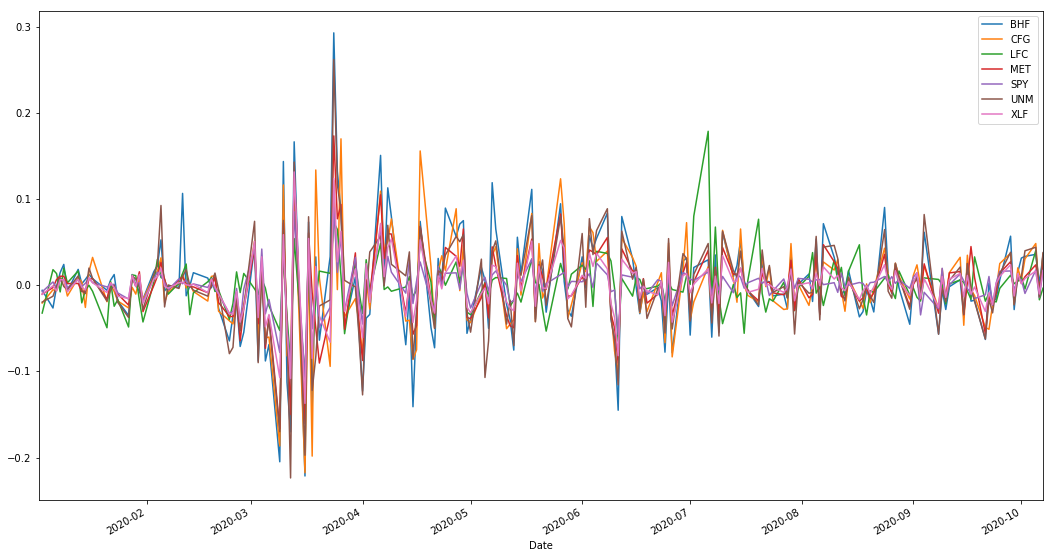

In [58]:
finance_change = finance_df.pct_change()
finance_change.plot(figsize = (18,10))

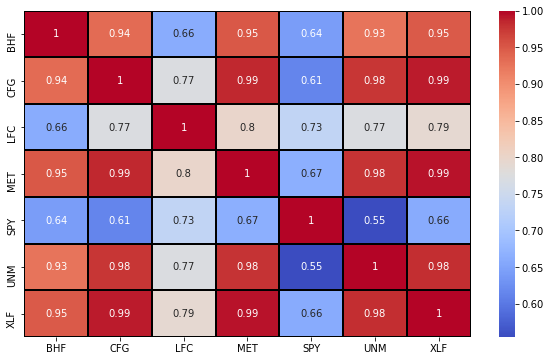

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(finance_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [60]:
BHF_beta = beta('BHF','SPY',7,finance_df)
UNM_beta = beta('UNM','SPY',7,finance_df)
MET_beta = beta('MET','SPY',7,finance_df)
CFG_beta = beta('CFG','SPY',7,finance_df)
LFC_beta = beta('LFC','SPY',7,finance_df)

In [61]:
XLF_beta.hvplot(label = "XLF") * BHF_beta.hvplot(label = "BHF") * UNM_beta.hvplot(label = "UNM") * MET_beta.hvplot(label = "MET") * CFG_beta.hvplot(label = "CFG") * LFC_beta.hvplot(label = "LFC")

:Overlay
   .Curve.XLF :Curve   [Date]   (0)
   .Curve.BHF :Curve   [Date]   (0)
   .Curve.UNM :Curve   [Date]   (0)
   .Curve.MET :Curve   [Date]   (0)
   .Curve.CFG :Curve   [Date]   (0)
   .Curve.LFC :Curve   [Date]   (0)

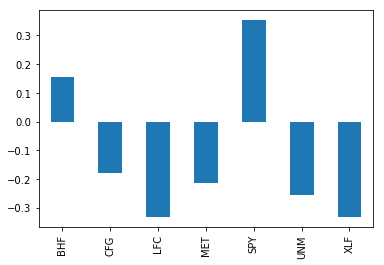

In [62]:
sharpe_ratios = (finance_change.mean() * 252) / (finance_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

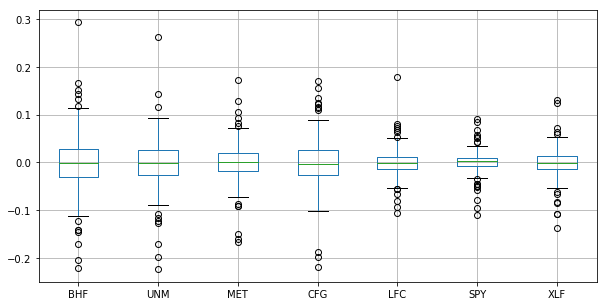

In [63]:
boxplot = finance_change.boxplot(column=['BHF','UNM','MET','CFG','LFC','SPY','XLF'],figsize=(10,5))

In [64]:
finance_change.std()

BHF    0.060881
CFG    0.051315
LFC    0.029832
MET    0.041054
SPY    0.023556
UNM    0.053784
XLF    0.031424
dtype: float64

In [65]:
positive_df.corrwith(finance_df, axis = 0)

BHF        NaN
CFG        NaN
LFC        NaN
MET        NaN
SPY        NaN
UNM        NaN
XLF        NaN
positive   NaN
dtype: float64

In [66]:
negative_df.corrwith(finance_df, axis = 0)

BHF        NaN
CFG        NaN
LFC        NaN
MET        NaN
SPY        NaN
UNM        NaN
XLF        NaN
negative   NaN
dtype: float64

In [67]:
death_df.corrwith(finance_df, axis = 0)

BHF     NaN
CFG     NaN
LFC     NaN
MET     NaN
SPY     NaN
UNM     NaN
XLF     NaN
death   NaN
dtype: float64

In [68]:
hospitalized_df.corrwith(finance_df, axis = 0)

BHF                      NaN
CFG                      NaN
LFC                      NaN
MET                      NaN
SPY                      NaN
UNM                      NaN
XLF                      NaN
hospitalizedCumulative   NaN
dtype: float64

### Industrials

In [69]:
industrial_df = yf.download(['EAF','AL','HII','FDX','VRT','SPY','XLI'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
industrial_df = industrial_df['Close']
industrial_df.head()

AL    EAF         FDX         HII         SPY    VRT  \
Date                                                                      
2020-01-02  47.320000  11.39  155.100006  255.850006  324.869995  11.22   
2020-01-03  47.619999  11.23  153.179993  263.500000  322.410004  11.24   
2020-01-06  47.189999  11.24  153.300003  265.000000  323.640015  11.32   
2020-01-07  46.540001  11.42  154.800003  267.459991  322.730011  11.41   
2020-01-08  46.720001  11.27  157.130005  268.959991  324.450012  11.45   

                  XLI  
Date                   
2020-01-02  83.010002  
2020-01-03  82.849998  
2020-01-06  82.879997  
2020-01-07  82.709999  
2020-01-08  82.989998

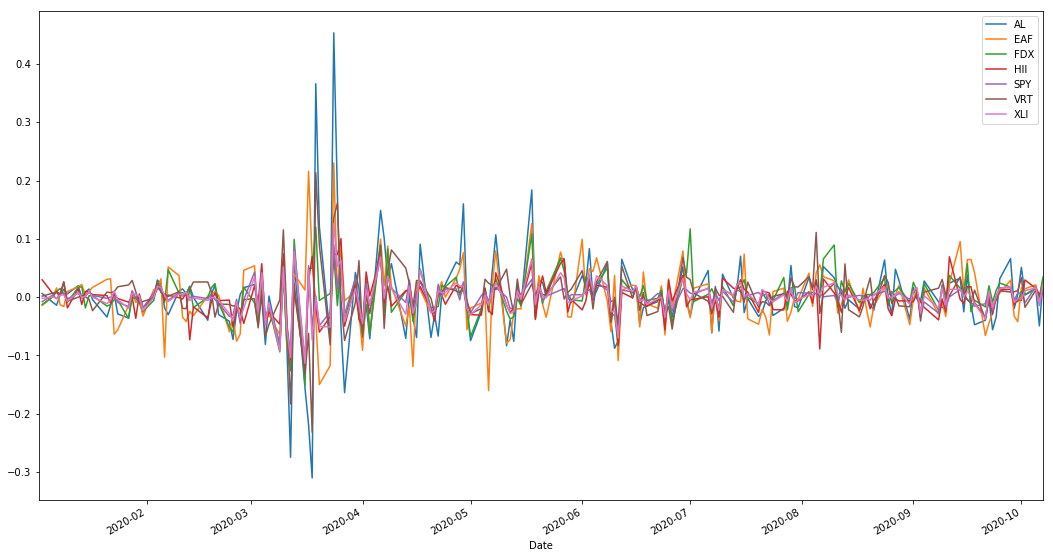

In [70]:
industrial_change = industrial_df.pct_change()
industrial_change.plot(figsize = (18,10))

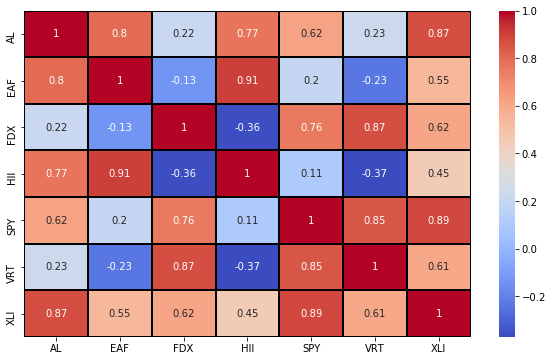

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(industrial_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [72]:
EAF_beta = beta('EAF','SPY',7,industrial_df)
AL_beta = beta('AL','SPY',7,industrial_df)
HII_beta = beta('HII','SPY',7,industrial_df)
FDX_beta = beta('FDX','SPY',7,industrial_df)
VRT_beta = beta('VRT','SPY',7,industrial_df)

In [73]:
XLI_beta.hvplot(label = "XLI") * EAF_beta.hvplot(label = "EAF") * AL_beta.hvplot(label = "AL") * HII_beta.hvplot(label = "HII") * FDX_beta.hvplot(label = "FDX") * VRT_beta.hvplot(label = "VRT")

:Overlay
   .Curve.XLI :Curve   [Date]   (0)
   .Curve.EAF :Curve   [Date]   (0)
   .Curve.AL  :Curve   [Date]   (0)
   .Curve.HII :Curve   [Date]   (0)
   .Curve.FDX :Curve   [Date]   (0)
   .Curve.VRT :Curve   [Date]   (0)

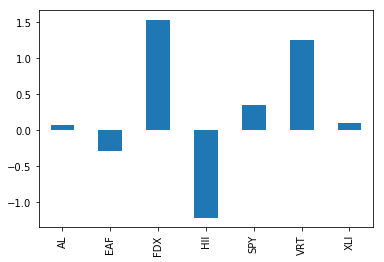

In [74]:
sharpe_ratios = (industrial_change.mean() * 252) / (industrial_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

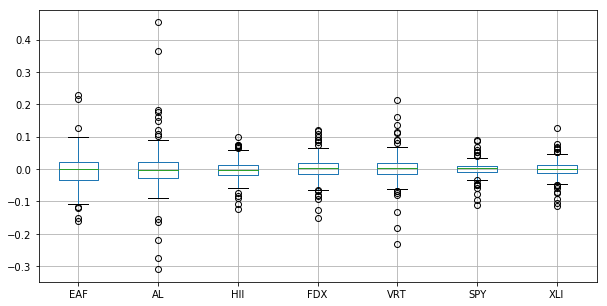

In [75]:
boxplot = industrial_change.boxplot(column=['EAF','AL','HII','FDX','VRT','SPY','XLI'],figsize=(10,5))

In [76]:
industrial_change.std()

AL     0.072718
EAF    0.051330
FDX    0.036141
HII    0.030864
SPY    0.023556
VRT    0.043750
XLI    0.027702
dtype: float64

In [77]:
positive_df.corrwith(industrial_df, axis = 0)

AL         NaN
EAF        NaN
FDX        NaN
HII        NaN
SPY        NaN
VRT        NaN
XLI        NaN
positive   NaN
dtype: float64

In [78]:
negative_df.corrwith(industrial_df, axis = 0)

AL         NaN
EAF        NaN
FDX        NaN
HII        NaN
SPY        NaN
VRT        NaN
XLI        NaN
negative   NaN
dtype: float64

In [79]:
death_df.corrwith(industrial_df, axis = 0)

AL      NaN
EAF     NaN
FDX     NaN
HII     NaN
SPY     NaN
VRT     NaN
XLI     NaN
death   NaN
dtype: float64

In [80]:
hospitalized_df.corrwith(industrial_df, axis = 0)

AL                       NaN
EAF                      NaN
FDX                      NaN
HII                      NaN
SPY                      NaN
VRT                      NaN
XLI                      NaN
hospitalizedCumulative   NaN
dtype: float64

### Technology

In [81]:
technology_df = yf.download(['MSFT','DELL','NLOK','XRX','NCR','SPY','XLK'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
technology_df = technology_df['Close']
technology_df.head()

DELL        MSFT        NCR       NLOK         SPY  \
Date                                                                  
2020-01-02  52.290001  160.619995  35.500000  26.020000  324.869995   
2020-01-03  50.570000  158.619995  35.119999  25.830000  322.410004   
2020-01-06  51.080002  159.029999  34.700001  26.389999  323.640015   
2020-01-07  49.799999  157.580002  34.610001  26.750000  322.730011   
2020-01-08  50.000000  160.089996  34.770000  26.610001  324.450012   

                  XLK        XRX  
Date                              
2020-01-02  93.389999  36.930000  
2020-01-03  92.339996  36.450001  
2020-01-06  92.559998  35.900002  
2020-01-07  92.519997  35.950001  
2020-01-08  93.510002  35.930000

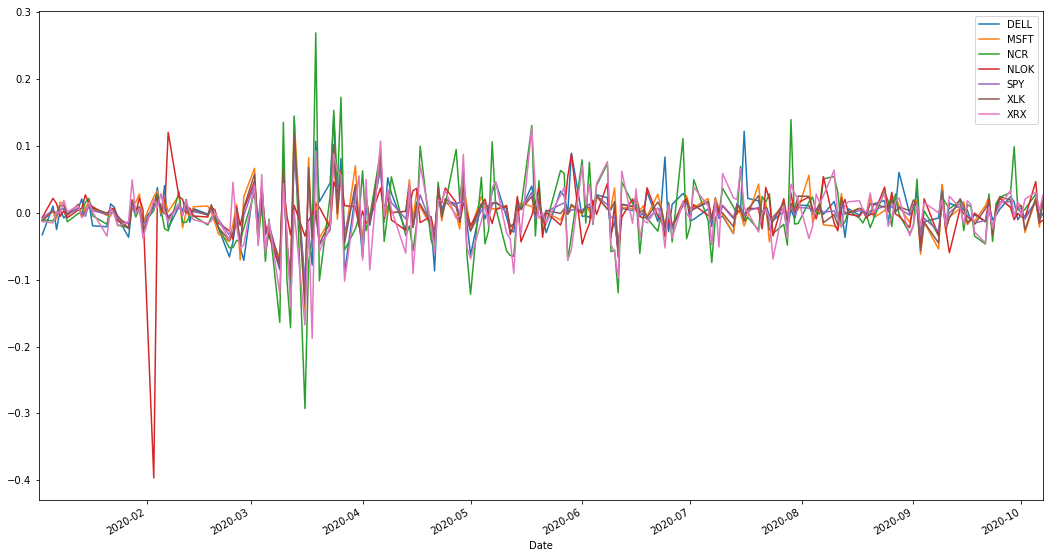

In [82]:
technology_change = technology_df.pct_change()
technology_change.plot(figsize = (18,10))

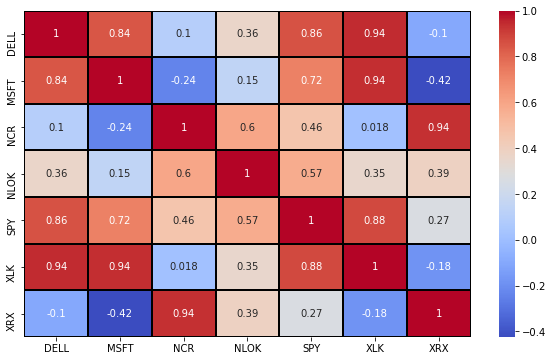

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(technology_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [84]:
MSFT_beta = beta('MSFT','SPY',7,technology_df)
DELL_beta = beta('DELL','SPY',7,technology_df)
NLOK_beta = beta('NLOK','SPY',7,technology_df)
XRX_beta = beta('XRX','SPY',7,technology_df)
NCR_beta = beta('NCR','SPY',7,technology_df)

In [85]:
XLK_beta.hvplot(label = "XLK") * MSFT_beta.hvplot(label = "MSFT") * DELL_beta.hvplot(label = "DELL") * NLOK_beta.hvplot(label = "NLOK") * XRX_beta.hvplot(label = "XRX") * NCR_beta.hvplot(label = "NCR")

:Overlay
   .Curve.XLK  :Curve   [Date]   (0)
   .Curve.MSFT :Curve   [Date]   (0)
   .Curve.DELL :Curve   [Date]   (0)
   .Curve.NLOK :Curve   [Date]   (0)
   .Curve.XRX  :Curve   [Date]   (0)
   .Curve.NCR  :Curve   [Date]   (0)

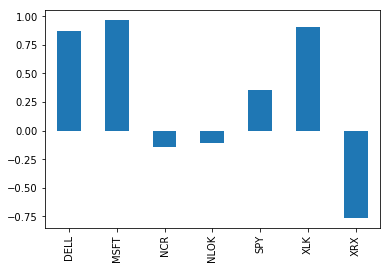

In [86]:
sharpe_ratios = (technology_change.mean() * 252) / (technology_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

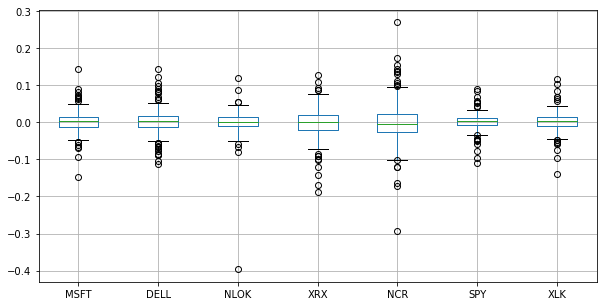

In [87]:
boxplot = technology_change.boxplot(column=['MSFT','DELL','NLOK','XRX','NCR','SPY','XLK'],figsize=(10,5))

In [88]:
technology_change.std()

DELL    0.035412
MSFT    0.030378
NCR     0.058031
NLOK    0.037977
SPY     0.023556
XLK     0.028017
XRX     0.044162
dtype: float64

In [89]:
positive_df.corrwith(technology_df, axis = 0)

DELL       NaN
MSFT       NaN
NCR        NaN
NLOK       NaN
SPY        NaN
XLK        NaN
XRX        NaN
positive   NaN
dtype: float64

In [90]:
negative_df.corrwith(technology_df, axis = 0)

DELL       NaN
MSFT       NaN
NCR        NaN
NLOK       NaN
SPY        NaN
XLK        NaN
XRX        NaN
negative   NaN
dtype: float64

In [91]:
death_df.corrwith(technology_df, axis = 0)

DELL    NaN
MSFT    NaN
NCR     NaN
NLOK    NaN
SPY     NaN
XLK     NaN
XRX     NaN
death   NaN
dtype: float64

In [92]:
hospitalized_df.corrwith(technology_df, axis = 0)

DELL                     NaN
MSFT                     NaN
NCR                      NaN
NLOK                     NaN
SPY                      NaN
XLK                      NaN
XRX                      NaN
hospitalizedCumulative   NaN
dtype: float64

### Consumer Staples

In [93]:
cs_df = yf.download(['ACI','CPB','KR','PG','KO','SPY','XLP'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
cs_df = cs_df['Close']
cs_df.head()

ACI        CPB         KO         KR          PG         SPY  \
Date                                                                       
2020-01-02  NaN  48.490002  54.990002  28.660000  123.410004  324.869995   
2020-01-03  NaN  48.430000  54.689999  28.700001  122.580002  322.410004   
2020-01-06  NaN  48.509998  54.669998  28.799999  122.750000  323.640015   
2020-01-07  NaN  48.189999  54.250000  28.590000  121.989998  322.730011   
2020-01-08  NaN  47.349998  54.349998  28.420000  122.510002  324.450012   

                  XLP  
Date                   
2020-01-02  62.480000  
2020-01-03  62.380001  
2020-01-06  62.509998  
2020-01-07  62.029999  
2020-01-08  62.259998

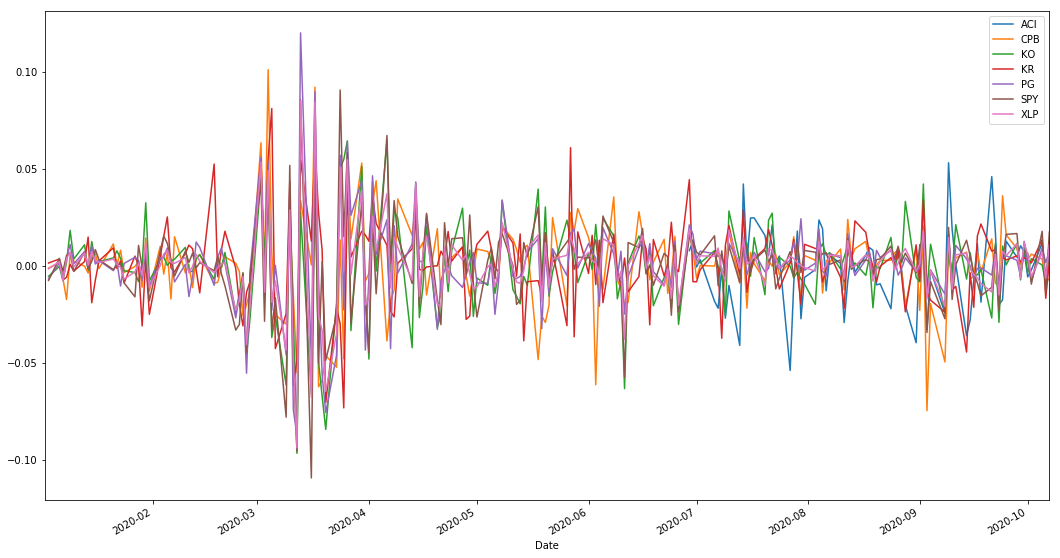

In [94]:
cs_change = cs_df.pct_change()
cs_change.plot(figsize = (18,10))

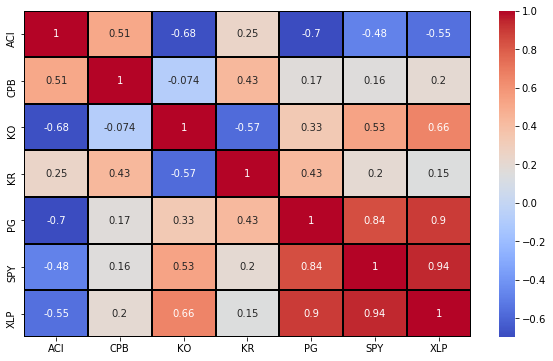

In [95]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cs_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [96]:
ACI_beta = beta('ACI','SPY',7,cs_df)
CPB_beta = beta('CPB','SPY',7,cs_df)
KR_beta = beta('KR','SPY',7,cs_df)
PG_beta = beta('PG','SPY',7,cs_df)
KO_beta = beta('KO','SPY',7,cs_df)

In [97]:
XLP_beta.hvplot(label = "XLP") * ACI_beta.hvplot(label = "ACI") * CPB_beta.hvplot(label = "CPB") * KR_beta.hvplot(label = "KR") * PG_beta.hvplot(label = "PG") * KO_beta.hvplot(label = "KO")

:Overlay
   .Curve.XLP :Curve   [Date]   (0)
   .Curve.ACI :Curve   [Date]   (0)
   .Curve.CPB :Curve   [Date]   (0)
   .Curve.KR  :Curve   [Date]   (0)
   .Curve.PG  :Curve   [Date]   (0)
   .Curve.KO  :Curve   [Date]   (0)

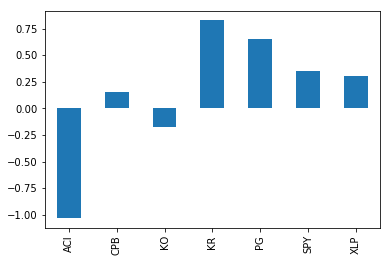

In [98]:
sharpe_ratios = (cs_change.mean() * 252) / (cs_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

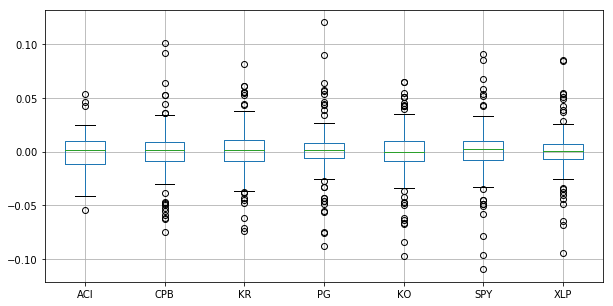

In [99]:
boxplot = cs_change.boxplot(column=['ACI','CPB','KR','PG','KO','SPY','XLP'],figsize=(10,5))

In [100]:
cs_df.std()

ACI     0.822957
CPB     2.151580
KO      5.023453
KR      2.449152
PG      9.359902
SPY    28.122904
XLP     3.477856
dtype: float64

In [101]:
positive_df.corrwith(cs_df, axis = 0)

ACI        NaN
CPB        NaN
KO         NaN
KR         NaN
PG         NaN
SPY        NaN
XLP        NaN
positive   NaN
dtype: float64

In [102]:
negative_df.corrwith(cs_df, axis = 0)

ACI        NaN
CPB        NaN
KO         NaN
KR         NaN
PG         NaN
SPY        NaN
XLP        NaN
negative   NaN
dtype: float64

In [103]:
death_df.corrwith(cs_df, axis = 0)

ACI     NaN
CPB     NaN
KO      NaN
KR      NaN
PG      NaN
SPY     NaN
XLP     NaN
death   NaN
dtype: float64

In [104]:
hospitalized_df.corrwith(cs_df, axis = 0)

ACI                      NaN
CPB                      NaN
KO                       NaN
KR                       NaN
PG                       NaN
SPY                      NaN
XLP                      NaN
hospitalizedCumulative   NaN
dtype: float64

### Health Care

In [105]:
hc_df = yf.download(['BIIB','BIO','CVS','VRTX','ISRG','SPY','XLV'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
hc_df = hc_df['Close']
hc_df.head()

BIIB         BIO        CVS        ISRG         SPY  \
Date                                                                    
2020-01-02  294.239990  372.160004  74.160004  597.260010  324.869995   
2020-01-03  290.850006  366.779999  73.570000  593.340027  322.410004   
2020-01-06  290.820007  372.029999  73.860001  595.760010  323.640015   
2020-01-07  290.089996  380.540009  73.580002  582.799988  322.730011   
2020-01-08  292.660004  381.790009  72.660004  581.780029  324.450012   

                  VRTX         XLV  
Date                                
2020-01-02  219.449997  102.129997  
2020-01-03  217.979996  101.239998  
2020-01-06  224.029999  101.870003  
2020-01-07  223.789993  101.669998  
2020-01-08  231.089996  102.330002

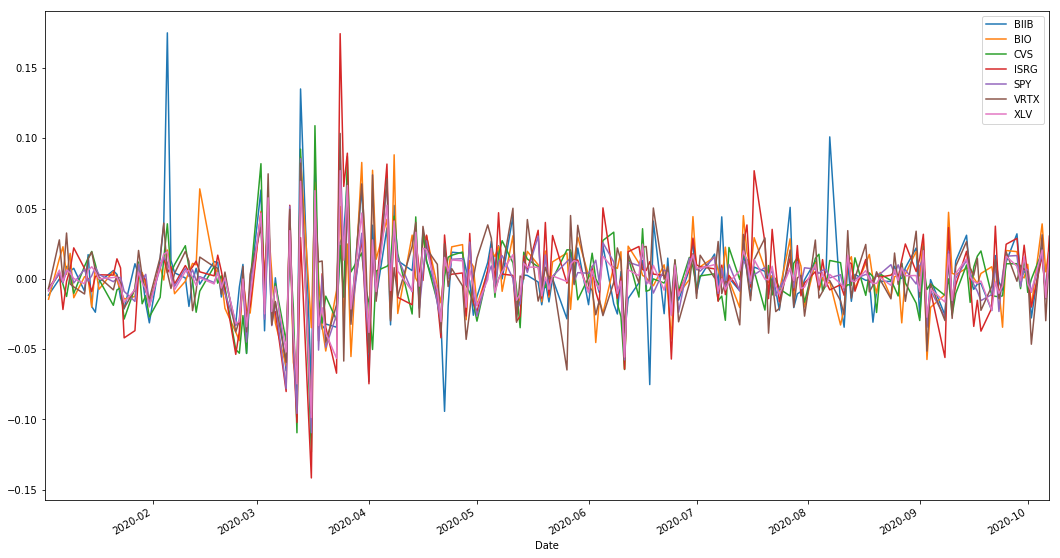

In [106]:
hc_change = hc_df.pct_change()
hc_change.plot(figsize = (18,10))

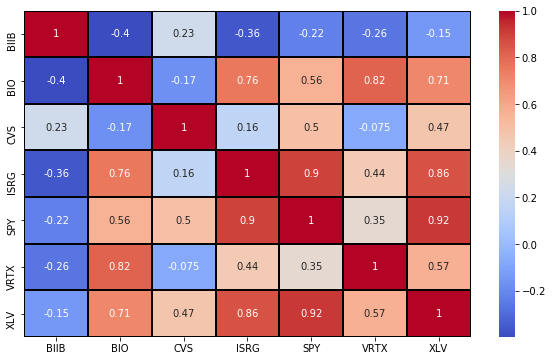

In [107]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(hc_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [108]:
BIIB_beta = beta('BIIB','SPY',7,hc_df)
BIO_beta = beta('BIO','SPY',7,hc_df)
CVS_beta = beta('CVS','SPY',7,hc_df)
VRTX_beta = beta('VRTX','SPY',7,hc_df)
ISRG_beta = beta('ISRG','SPY',7,hc_df)

In [109]:
XLV_beta.hvplot(label = "XLV") * BIIB_beta.hvplot(label = "BIIB") * BIO_beta.hvplot(label = "BIO") * CVS_beta.hvplot(label = "CVS") * VRTX_beta.hvplot(label = "VRTX") * ISRG_beta.hvplot(label = "ISRG")

:Overlay
   .Curve.XLV  :Curve   [Date]   (0)
   .Curve.BIIB :Curve   [Date]   (0)
   .Curve.BIO  :Curve   [Date]   (0)
   .Curve.CVS  :Curve   [Date]   (0)
   .Curve.VRTX :Curve   [Date]   (0)
   .Curve.ISRG :Curve   [Date]   (0)

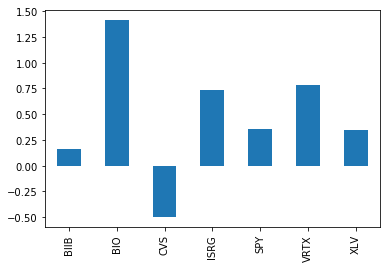

In [110]:
sharpe_ratios = (hc_change.mean() * 252) / (hc_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

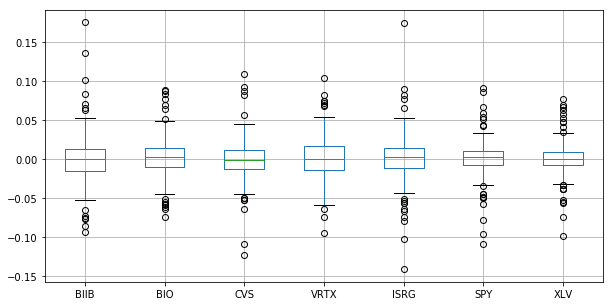

In [111]:
boxplot = hc_change.boxplot(column=['BIIB','BIO','CVS','VRTX','ISRG','SPY','XLV'],figsize=(10,5))

In [112]:
hc_df.std()

BIIB    20.640564
BIO     62.727605
CVS      5.114697
ISRG    80.890108
SPY     28.122904
VRTX    24.142730
XLV      6.293249
dtype: float64

In [113]:
positive_df.corrwith(hc_df, axis = 0)

BIIB       NaN
BIO        NaN
CVS        NaN
ISRG       NaN
SPY        NaN
VRTX       NaN
XLV        NaN
positive   NaN
dtype: float64

In [114]:
negative_df.corrwith(hc_df, axis = 0)

BIIB       NaN
BIO        NaN
CVS        NaN
ISRG       NaN
SPY        NaN
VRTX       NaN
XLV        NaN
negative   NaN
dtype: float64

In [115]:
death_df.corrwith(hc_df, axis = 0)

BIIB    NaN
BIO     NaN
CVS     NaN
ISRG    NaN
SPY     NaN
VRTX    NaN
XLV     NaN
death   NaN
dtype: float64

In [116]:
hospitalized_df.corrwith(hc_df, axis = 0)

BIIB                     NaN
BIO                      NaN
CVS                      NaN
ISRG                     NaN
SPY                      NaN
VRTX                     NaN
XLV                      NaN
hospitalizedCumulative   NaN
dtype: float64

### Consumer Discretionary

In [117]:
cd_df = yf.download(['ARD','MGM','EBAY','MCD','ROST','SPY','XLY'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
cd_df = cd_df['Close']
cd_df.head()

ARD       EBAY         MCD        MGM        ROST  \
Date                                                                  
2020-01-02  19.480000  36.299999  200.789993  33.660000  116.830002   
2020-01-03  19.240000  35.959999  200.080002  33.290001  116.860001   
2020-01-06  19.590000  35.779999  202.330002  32.889999  117.430000   
2020-01-07  19.469999  35.619999  202.630005  32.910000  118.800003   
2020-01-08  19.520000  35.599998  205.910004  33.240002  119.150002   

                   SPY         XLY  
Date                                
2020-01-02  324.869995  126.910004  
2020-01-03  322.410004  125.830002  
2020-01-06  323.640015  126.180000  
2020-01-07  322.730011  125.980003  
2020-01-08  324.450012  126.360001

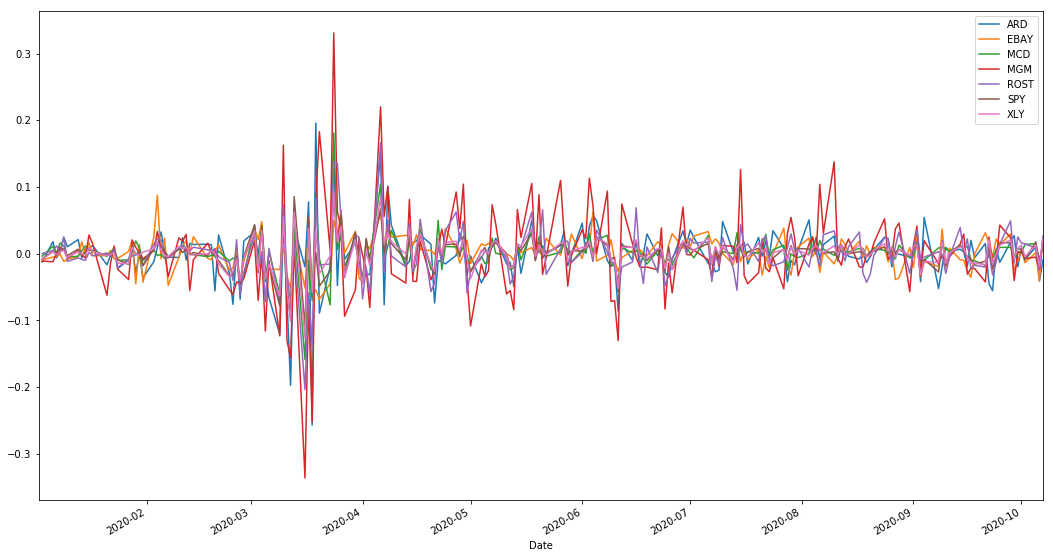

In [118]:
cd_change = cd_df.pct_change()
cd_change.plot(figsize = (18,10))

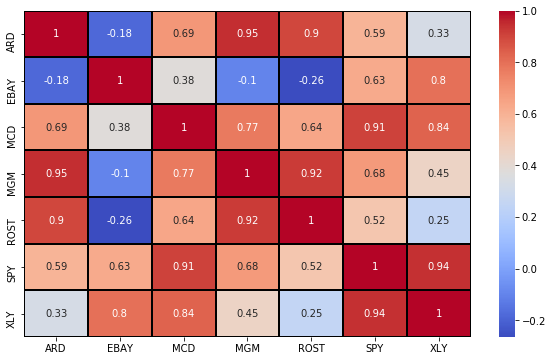

In [119]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cd_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [120]:
ARD_beta = beta('ARD','SPY',7,cd_df)
MGM_beta = beta('MGM','SPY',7,cd_df)
EBAY_beta = beta('EBAY','SPY',7,cd_df)
MCD_beta = beta('MCD','SPY',7,cd_df)
ROST_beta = beta('ROST','SPY',7,cd_df)

In [121]:
XLY_beta.hvplot(label = "XLY") * ARD_beta.hvplot(label = "ARD") * MGM_beta.hvplot(label = "MGM") * EBAY_beta.hvplot(label = "EBAY") * ROST_beta.hvplot(label = "ROST") * MCD_beta.hvplot(label = "MCD")

:Overlay
   .Curve.XLY  :Curve   [Date]   (0)
   .Curve.ARD  :Curve   [Date]   (0)
   .Curve.MGM  :Curve   [Date]   (0)
   .Curve.EBAY :Curve   [Date]   (0)
   .Curve.ROST :Curve   [Date]   (0)
   .Curve.MCD  :Curve   [Date]   (0)

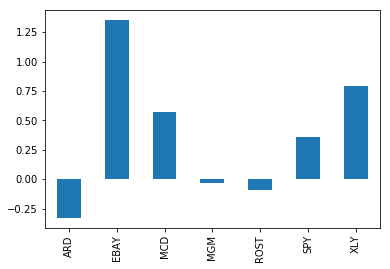

In [122]:
sharpe_ratios = (cd_change.mean() * 252) / (cd_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

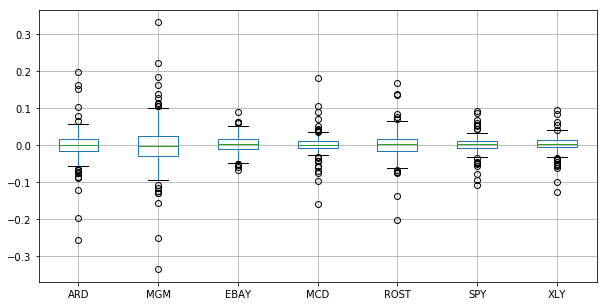

In [123]:
boxplot = cd_change.boxplot(column=['ARD','MGM','EBAY','MCD','ROST','SPY','XLY'],figsize=(10,5))

In [124]:
cd_df.std()

ARD      2.968405
EBAY     9.307845
MCD     18.398609
MGM      6.735356
ROST    13.405905
SPY     28.122904
XLY     15.571236
dtype: float64

In [125]:
positive_df.corrwith(cd_df, axis = 0)

ARD        NaN
EBAY       NaN
MCD        NaN
MGM        NaN
ROST       NaN
SPY        NaN
XLY        NaN
positive   NaN
dtype: float64

In [126]:
negative_df.corrwith(cd_df, axis = 0)

ARD        NaN
EBAY       NaN
MCD        NaN
MGM        NaN
ROST       NaN
SPY        NaN
XLY        NaN
negative   NaN
dtype: float64

In [127]:
death_df.corrwith(cd_df, axis = 0)

ARD     NaN
EBAY    NaN
MCD     NaN
MGM     NaN
ROST    NaN
SPY     NaN
XLY     NaN
death   NaN
dtype: float64

In [128]:
hospitalized_df.corrwith(cd_df, axis = 0)

ARD                      NaN
EBAY                     NaN
MCD                      NaN
MGM                      NaN
ROST                     NaN
SPY                      NaN
XLY                      NaN
hospitalizedCumulative   NaN
dtype: float64

In [129]:
### Real Estate

In [130]:
re_df = yf.download(['ACLD','AGNC','ADC','ALX','ARE','SPY','XLRE'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
re_df = re_df['Close']
re_df.head()

ACLD        ADC       AGNC         ALX         ARE         SPY  \
Date                                                                         
2020-01-02  0.08  67.660004  17.780001  328.519989  159.729996  324.869995   
2020-01-03  0.08  69.260002  17.730000  332.609985  160.639999  322.410004   
2020-01-06  0.08  69.980003  17.730000  337.470001  161.029999  323.640015   
2020-01-07  0.08  69.989998  17.930000  327.359985  155.759995  322.730011   
2020-01-08  0.08  69.870003  17.879999  330.899994  157.830002  324.450012   

                 XLRE  
Date                   
2020-01-02  38.220001  
2020-01-03  38.500000  
2020-01-06  38.509998  
2020-01-07  38.090000  
2020-01-08  38.279999

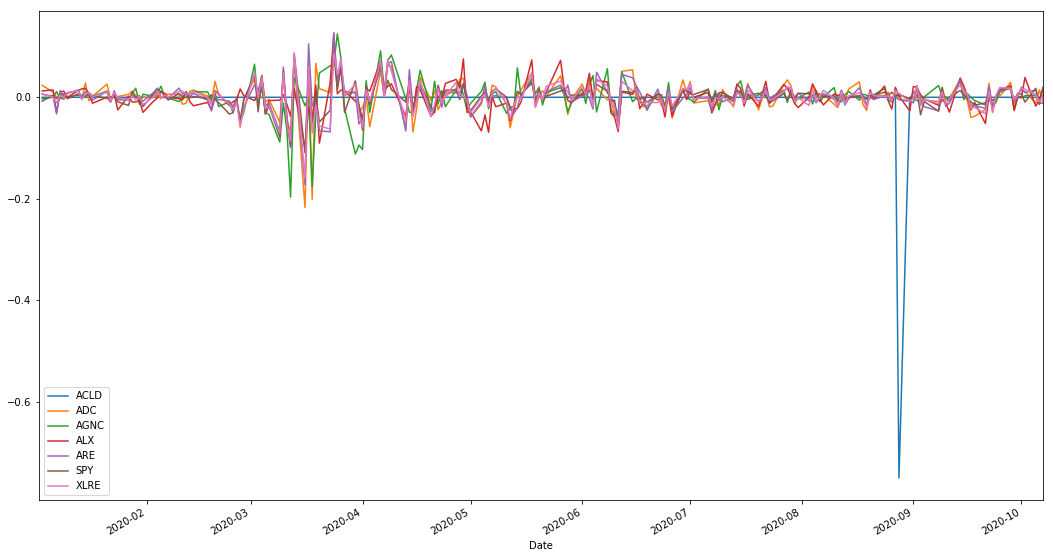

In [131]:
re_change = re_df.pct_change()
re_change.plot(figsize = (18,10))

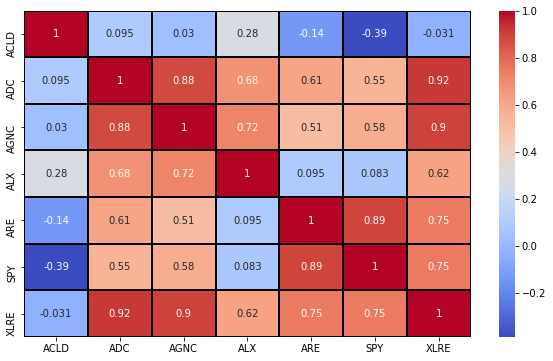

In [132]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(re_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [133]:
ACLD_beta = beta('ACLD','SPY',7,re_df)
AGNC_beta = beta('AGNC','SPY',7,re_df)
ADC_beta = beta('ADC','SPY',7,re_df)
ALX_beta = beta('ALX','SPY',7,re_df)
ARE_beta = beta('ARE','SPY',7,re_df)

In [134]:
XLRE_beta.hvplot(label = "XLRE") * ACLD_beta.hvplot(label = "ACLD") * AGNC_beta.hvplot(label = "AGNC") * ADC_beta.hvplot(label = "ADC") * ALX_beta.hvplot(label = "ALX") * ARE_beta.hvplot(label = "ARE")

:Overlay
   .Curve.XLRE :Curve   [Date]   (0)
   .Curve.ACLD :Curve   [Date]   (0)
   .Curve.AGNC :Curve   [Date]   (0)
   .Curve.ADC  :Curve   [Date]   (0)
   .Curve.ALX  :Curve   [Date]   (0)
   .Curve.ARE  :Curve   [Date]   (0)

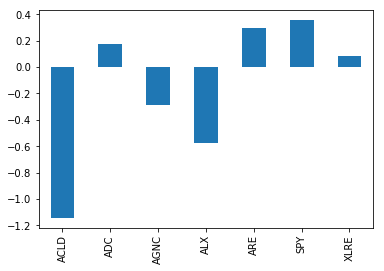

In [135]:
sharpe_ratios = (re_change.mean() * 252) / (re_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

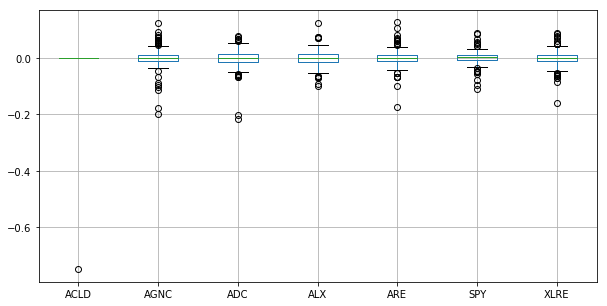

In [136]:
boxplot = re_change.boxplot(column=['ACLD','AGNC','ADC','ALX','ARE','SPY','XLRE'],figsize=(10,5))

In [137]:
re_df.std()

ACLD     0.020867
ADC      5.614694
AGNC     2.516061
ALX     33.025067
ARE     11.713663
SPY     28.122904
XLRE     3.040197
dtype: float64

In [138]:
positive_df.corrwith(re_df, axis = 0)

ACLD       NaN
ADC        NaN
AGNC       NaN
ALX        NaN
ARE        NaN
SPY        NaN
XLRE       NaN
positive   NaN
dtype: float64

In [139]:
negative_df.corrwith(re_df, axis = 0)

ACLD       NaN
ADC        NaN
AGNC       NaN
ALX        NaN
ARE        NaN
SPY        NaN
XLRE       NaN
negative   NaN
dtype: float64

In [140]:
death_df.corrwith(re_df, axis = 0)

ACLD    NaN
ADC     NaN
AGNC    NaN
ALX     NaN
ARE     NaN
SPY     NaN
XLRE    NaN
death   NaN
dtype: float64

In [141]:
hospitalized_df.corrwith(re_df, axis = 0)

ACLD                     NaN
ADC                      NaN
AGNC                     NaN
ALX                      NaN
ARE                      NaN
SPY                      NaN
XLRE                     NaN
hospitalizedCumulative   NaN
dtype: float64

### Utilities

In [142]:
utilities_df = yf.download(['NRG','SRE','PPL','AWK','BIP','SPY','XLU'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
utilities_df = utilities_df['Close']
utilities_df.head()

AWK        BIP        NRG        PPL         SPY  \
Date                                                                  
2020-01-02  120.199997  44.687500  38.799999  35.419998  324.869995   
2020-01-03  120.980003  44.866070  38.200001  35.380001  322.410004   
2020-01-06  120.750000  45.008930  37.380001  35.419998  323.640015   
2020-01-07  120.000000  44.785713  36.869999  35.180000  322.730011   
2020-01-08  120.489998  44.776787  36.860001  35.380001  324.450012   

                   SRE        XLU  
Date                               
2020-01-02  149.119995  63.810001  
2020-01-03  147.759995  63.939999  
2020-01-06  149.000000  64.000000  
2020-01-07  148.880005  63.910000  
2020-01-08  149.899994  63.880001

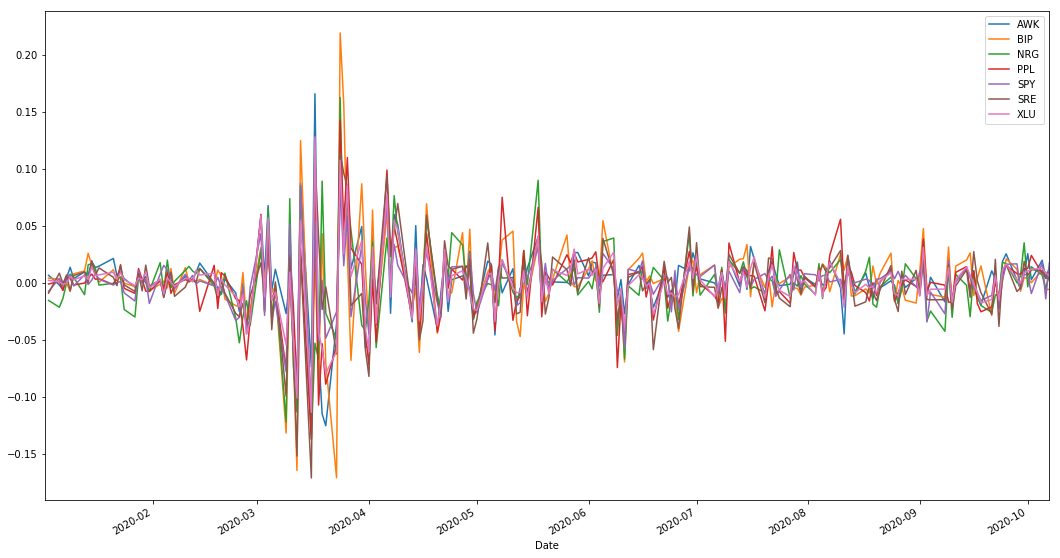

In [143]:
utilities_change = utilities_df.pct_change()
utilities_change.plot(figsize = (18,10))

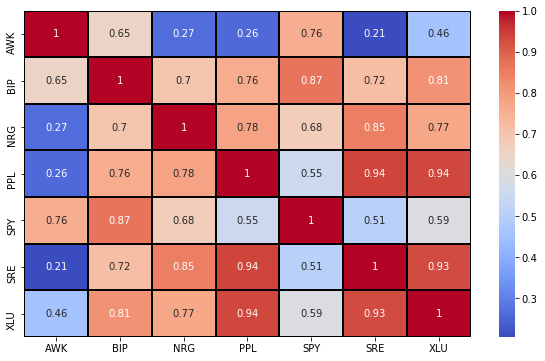

In [144]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(utilities_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [145]:
NRG_beta = beta('NRG','SPY',7,utilities_df)
SRE_beta = beta('SRE','SPY',7,utilities_df)
PPL_beta = beta('PPL','SPY',7,utilities_df)
AWK_beta = beta('AWK','SPY',7,utilities_df)
BIP_beta = beta('BIP','SPY',7,utilities_df)

In [146]:
XLU_beta.hvplot(label = "XLU") * NRG_beta.hvplot(label = "NRG") * SRE_beta.hvplot(label = "SRE") * PPL_beta.hvplot(label = "PPL") * AWK_beta.hvplot(label = "AWK") * BIP_beta.hvplot(label = "BIP")

:Overlay
   .Curve.XLU :Curve   [Date]   (0)
   .Curve.NRG :Curve   [Date]   (0)
   .Curve.SRE :Curve   [Date]   (0)
   .Curve.PPL :Curve   [Date]   (0)
   .Curve.AWK :Curve   [Date]   (0)
   .Curve.BIP :Curve   [Date]   (0)

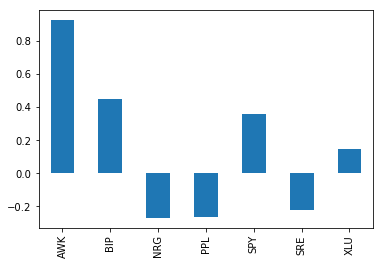

In [147]:
sharpe_ratios = (utilities_change.mean() * 252) / (utilities_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

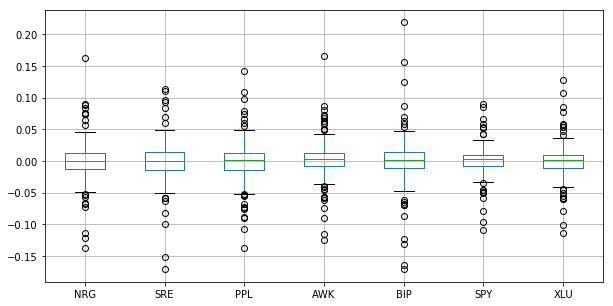

In [148]:
boxplot = utilities_change.boxplot(column=['NRG','SRE','PPL','AWK','BIP','SPY','XLU'],figsize=(10,5))

In [149]:
utilities_df.std()

AWK    10.445871
BIP     4.651674
NRG     3.577775
PPL     4.152755
SPY    28.122904
SRE    15.634587
XLU     4.725044
dtype: float64

In [150]:
positive_df.corrwith(utilities_df, axis = 0)

AWK        NaN
BIP        NaN
NRG        NaN
PPL        NaN
SPY        NaN
SRE        NaN
XLU        NaN
positive   NaN
dtype: float64

In [151]:
negative_df.corrwith(utilities_df, axis = 0)

AWK        NaN
BIP        NaN
NRG        NaN
PPL        NaN
SPY        NaN
SRE        NaN
XLU        NaN
negative   NaN
dtype: float64

In [152]:
death_df.corrwith(utilities_df, axis = 0)

AWK     NaN
BIP     NaN
NRG     NaN
PPL     NaN
SPY     NaN
SRE     NaN
XLU     NaN
death   NaN
dtype: float64

In [153]:
hospitalized_df.corrwith(utilities_df, axis = 0)

AWK                      NaN
BIP                      NaN
NRG                      NaN
PPL                      NaN
SPY                      NaN
SRE                      NaN
XLU                      NaN
hospitalizedCumulative   NaN
dtype: float64